In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('simu.s2.dat', skiprows=31, sep='\t')

In [3]:
data

,;,position,data,date,RA,delta,RA.1,DEC,delta.1,DEC.1
0,1992.,-0.00469616676836,0.00001,0.176147552781,0.00001,;,simulated NACO,NaN,NaN,NaN
1,1992.002,-0.00471922735542,0.00001,0.176157811467,0.00001,;,simulated NACO,NaN,NaN,NaN
2,1992.004,-0.00474228743009,0.00001,0.176168051026,0.00001,;,simulated NACO,NaN,NaN,NaN
3,1992.006,-0.00476534699001,0.00001,0.176178271463,0.00001,;,simulated NACO,NaN,NaN,NaN
4,1992.008,-0.00478840603283,0.00001,0.176188472783,0.00001,;,simulated NACO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
30999,2022.994,-623.412479956,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
31000,2022.996,-623.091097079,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
31001,2022.998,-622.769794031,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
31002,2023.,-622.448570714,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN


In [4]:
params = {'semi_major_axis_in_arcsec': 0.124972968666,
          'numerical_eccentricity': 0.884421772005,
          'orbital_period_in_years': 16.046021,
          'epoch_of_periastron_passage_in_years': 2018.379,
          'inclination_in_deg': 134.682325911,
          'position_angle_ascending_node_in_deg': 228.192975708,
          'longitude of periastron in deg': 66.2808487239}

In [5]:
split_at = data.loc[data[';']==';'].index[0]
split_at
pos, vel = data.iloc[:split_at], data.iloc[split_at:]
vel = vel.rename(columns=vel.iloc[0])
vel = vel.reset_index(drop=True)
vel = vel.drop(0)
vel = vel.reset_index(drop=True)
vel


,;,velocity,data,date,v,delta,v,NaN,NaN,NaN
0,1992.,-456.693344516,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
1,1992.002,-456.403789129,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
2,1992.004,-456.114273224,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
3,1992.006,-455.824796741,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
4,1992.008,-455.535359624,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
15497,2022.994,-623.412479956,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
15498,2022.996,-623.091097079,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
15499,2022.998,-622.769794031,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
15500,2023.,-622.448570714,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN


In [6]:
posvel = pd.concat([pos, vel], axis=1, )
posvel.head()
# pos.head(), vel.head()

,;,position,data,date,RA,delta,RA.1,DEC,delta.1,DEC.1,;,velocity,data,date,v,delta,v,NaN,NaN,NaN
0,1992.,-0.00469616676836,0.00001,0.176147552781,0.00001,;,simulated NACO,NaN,NaN,NaN,1992.,-456.693344516,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
1,1992.002,-0.00471922735542,0.00001,0.176157811467,0.00001,;,simulated NACO,NaN,NaN,NaN,1992.002,-456.403789129,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
2,1992.004,-0.00474228743009,0.00001,0.176168051026,0.00001,;,simulated NACO,NaN,NaN,NaN,1992.004,-456.114273224,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
3,1992.006,-0.00476534699001,0.00001,0.176178271463,0.00001,;,simulated NACO,NaN,NaN,NaN,1992.006,-455.824796741,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN
4,1992.008,-0.00478840603283,0.00001,0.176188472783,0.00001,;,simulated NACO,NaN,NaN,NaN,1992.008,-455.535359624,0.1,;,simulated SINFONI,NaN,NaN,NaN,NaN,NaN


In [10]:
posvel = posvel.dropna(axis=1, how='all')

In [11]:
posvel.head()

,;,position,data,date,RA,delta,RA.1,;,velocity,data,date,v
0,1992.,-0.00469616676836,0.00001,0.176147552781,0.00001,;,simulated NACO,1992.,-456.693344516,0.1,;,simulated SINFONI
1,1992.002,-0.00471922735542,0.00001,0.176157811467,0.00001,;,simulated NACO,1992.002,-456.403789129,0.1,;,simulated SINFONI
2,1992.004,-0.00474228743009,0.00001,0.176168051026,0.00001,;,simulated NACO,1992.004,-456.114273224,0.1,;,simulated SINFONI
3,1992.006,-0.00476534699001,0.00001,0.176178271463,0.00001,;,simulated NACO,1992.006,-455.824796741,0.1,;,simulated SINFONI
4,1992.008,-0.00478840603283,0.00001,0.176188472783,0.00001,;,simulated NACO,1992.008,-455.535359624,0.1,;,simulated SINFONI


pc: parsec = 206.000 au: astronomical units
arcsec = 1/60th of a degree = 1/21.600th of a turn
epoch of periastron (closest approach to main celestial body)

### Visualization of Orbits

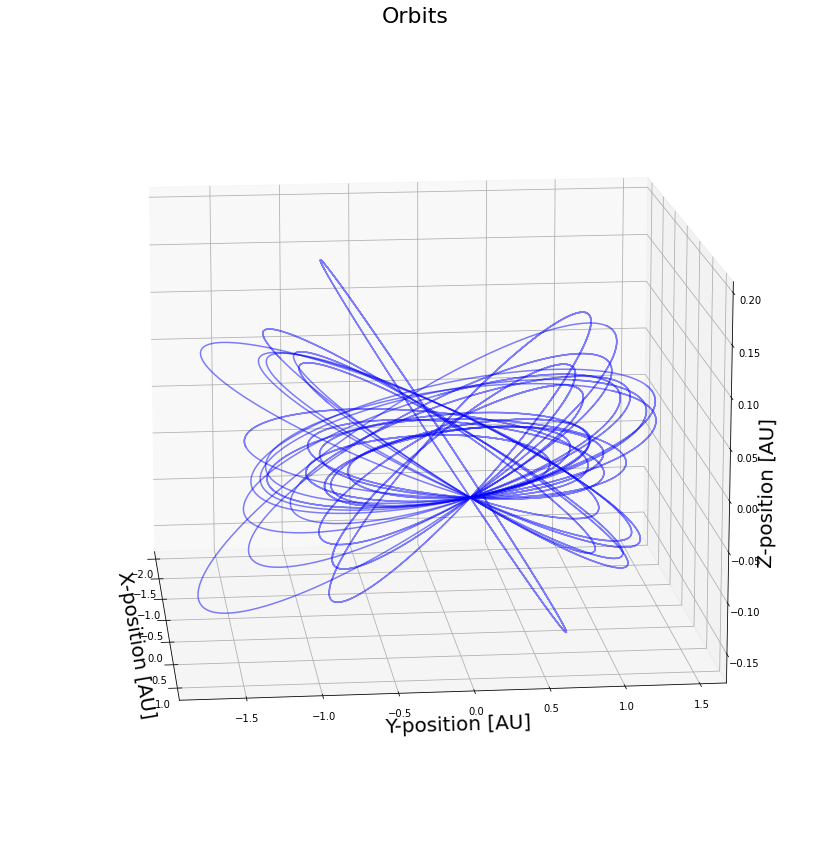

In [13]:
import pyorb

import numpy as np
import matplotlib.pyplot as plt

#for reproducibility
np.random.seed(12398748)

#We first create a standard orbit around the sun in SI units
#We want it to be completely empty to start with so we set num=0
orb = pyorb.Orbit(M0 = pyorb.M_sol, num=0)

#Create 10 equal orbits
orb.add(num=25, a=pyorb.AU, e=0, i=0, omega=0, Omega=0, anom=0)

#calculate cartesian elements
orb.calculate_cartesian()

#Add a symmetric Gaussian distribution on the velocity
std = 3e3
orb.vx += np.random.randn(orb.num)*std
orb.vy += np.random.randn(orb.num)*std
orb.vz += np.random.randn(orb.num)*std

#Go back to kepler based on the cartesian
orb.calculate_kepler()

dt = 3600*24.0*2
num = 400

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for o in orb:
    r = np.empty((3,num))

    for ti in range(num):
        o.propagate(dt)
        r[:,ti] = np.squeeze(o.r)/pyorb.AU

    ax.plot(r[0,:], r[1,:], r[2,:],  '-b', alpha=0.5)

ax.set_title('Orbits', fontsize=22)
ax.set_xlabel('X-position [AU]', fontsize=20)
ax.set_ylabel('Y-position [AU]', fontsize=20)
ax.set_zlabel('Z-position [AU]', fontsize=20)
ax.view_init(14,-6)
plt.show()


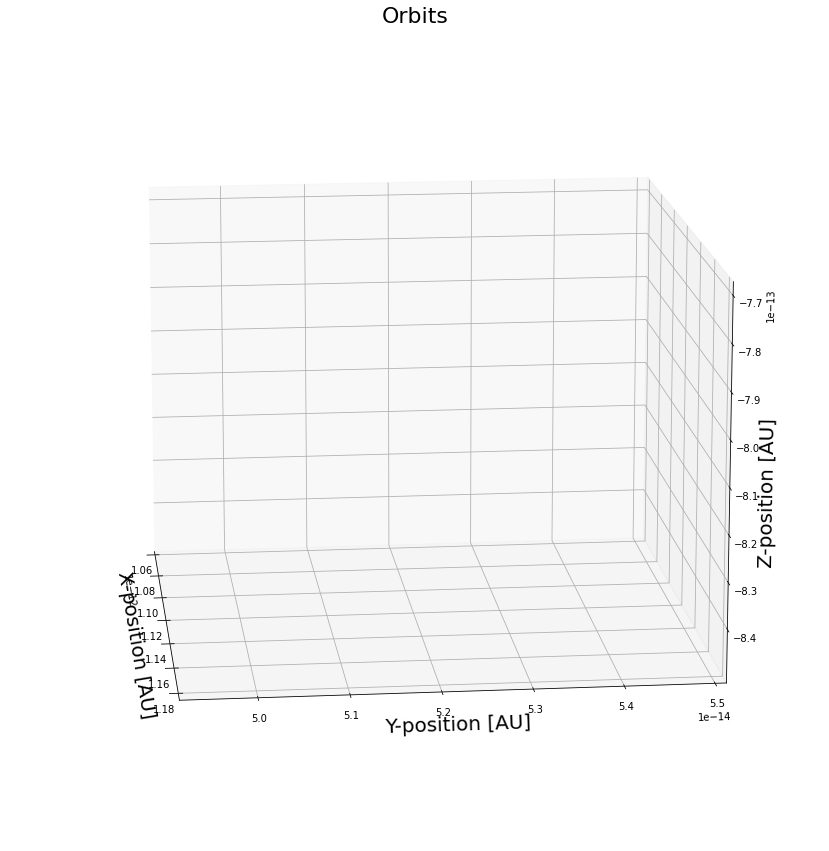

In [29]:
import pyorb

import numpy as np
import matplotlib.pyplot as plt

#for reproducibility
np.random.seed(12398748)

#We first create a standard orbit around the sun in SI units
#We want it to be completely empty to start with so we set num=0
orb = pyorb.Orbit(pyorb.M_sol, degrees=True)

#Create 10 equal orbits
orb.add(num=1, a=0.12495, e=0.88441, i=134.7, omega=66.25, Omega=228.19, anom=0.)

#calculate cartesian elements
orb.calculate_cartesian()

#Add a symmetric Gaussian distribution on the velocity
# std = 3e3
# orb.vx += np.random.randn(orb.num)*std
# orb.vy += np.random.randn(orb.num)*std
# orb.vz += np.random.randn(orb.num)*std

#Go back to kepler based on the cartesian
orb.calculate_kepler()

dt = 3600*24.0 * 10
num = 40000

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
for o in orb:
    r = np.empty((3,num))

    for ti in range(num):
        o.propagate(dt)
        r[:,ti] = np.squeeze(o.r)/pyorb.AU

    ax.plot(r[0,:], r[1,:], r[2,:],  '-b', alpha=0.5)

ax.set_title('Orbits', fontsize=22)
ax.set_xlabel('X-position [AU]', fontsize=20)
ax.set_ylabel('Y-position [AU]', fontsize=20)
ax.set_zlabel('Z-position [AU]', fontsize=20)
ax.view_init(14,-6)
plt.show()
